<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/CNN_Image_classification_cifar10_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.datasets import cifar10
%matplotlib inline

In [19]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

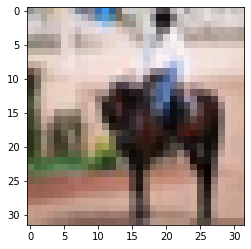

In [4]:
single_image=X_train[11]
plt.imshow(single_image)
plt.show()

In [11]:
temp_df=pd.DataFrame(y_train)
temp_df[0].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

In [14]:
X_train[0].shape

(32, 32, 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [15]:
from keras.utils.np_utils import to_categorical

In [20]:
cat_y_train=to_categorical(y_train)
cat_y_test=to_categorical(y_test)

In [21]:
y_train[0]

array([6], dtype=uint8)

In [23]:
cat_y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [60]:
X_train=X_train/255
X_test=X_test/255

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [87]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

In [89]:
model.fit(X_train,cat_y_train,epochs=10,validation_data=(X_test,cat_y_test))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8036 - accuracy: 0.3367 - val_loss: 1.4442 - val_accuracy: 0.4976
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2042 - accuracy: 0.5753 - val_loss: 1.1562 - val_accuracy: 0.6041
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0228 - accuracy: 0.6448 - val_loss: 1.0337 - val_accuracy: 0.6379
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9430 - accuracy: 0.6770 - val_loss: 1.2704 - val_accuracy: 0.6035
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8935 - accuracy: 0.6967 - val_loss: 1.5164 - val_accuracy: 0.5778
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8699 - accuracy: 0.7073 - val_loss: 1.2195 - val_accuracy: 0.6142
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8367 - accuracy: 0.7203 - val_loss: 1.2346 -

In [90]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.566938,0.43318,1.444249,0.4976
1,1.174109,0.58860,1.156238,0.6041
2,1.025895,0.64554,1.033710,0.6379
3,0.954036,0.67548,1.270376,0.6035
4,0.907968,0.69438,1.516391,0.5778


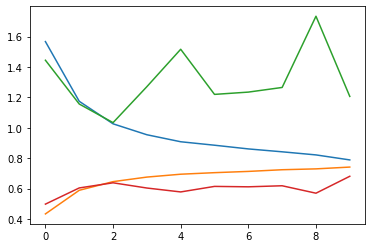

In [91]:
plt.plot(loss_df)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [93]:
predictions=model.predict_classes(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 8, ..., 5, 1, 7])

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.79      0.81      0.80      1000
           2       0.63      0.51      0.56      1000
           3       0.55      0.44      0.49      1000
           4       0.68      0.61      0.64      1000
           5       0.58      0.58      0.58      1000
           6       0.87      0.69      0.76      1000
           7       0.68      0.79      0.73      1000
           8       0.85      0.70      0.77      1000
           9       0.61      0.89      0.72      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [95]:
print(confusion_matrix(y_test,predictions))

[[788  40  18   7   9   4   3  12  33  86]
 [ 14 812   3   2   2   3   4   8  12 140]
 [129  16 509  49  99  90  32  35  16  25]
 [ 49  16  59 444  62 185  33  62  20  70]
 [ 51   5  61  57 607  41  17 118  16  27]
 [ 27   7  50 144  40 576  11 100   6  39]
 [ 15  10  65  69  42  46 685   6   7  55]
 [ 19  10  22  26  29  47   1 792   3  51]
 [ 99  70  10   8   5   7   2  12 704  83]
 [ 23  45   9   5   0   2   3  14   8 891]]


In [96]:
lst1=[]
lst2=[]

for i in range(10):
  lst1.append('Predictes_'+str(i))
  lst2.append('Actually_'+str(i))

In [97]:
confusion_matrix_df=pd.DataFrame(index=lst2,columns=lst1,data=confusion_matrix(y_test,predictions))
confusion_matrix_df

,Predictes_0,Predictes_1,Predictes_2,Predictes_3,Predictes_4,Predictes_5,Predictes_6,Predictes_7,Predictes_8,Predictes_9
Actually_0,788,40,18,7,9,4,3,12,33,86
Actually_1,14,812,3,2,2,3,4,8,12,140
Actually_2,129,16,509,49,99,90,32,35,16,25
Actually_3,49,16,59,444,62,185,33,62,20,70
Actually_4,51,5,61,57,607,41,17,118,16,27
Actually_5,27,7,50,144,40,576,11,100,6,39
Actually_6,15,10,65,69,42,46,685,6,7,55
Actually_7,19,10,22,26,29,47,1,792,3,51
Actually_8,99,70,10,8,5,7,2,12,704,83
Actually_9,23,45,9,5,0,2,3,14,8,891


In [98]:
print(accuracy_score(y_test,predictions))

0.6808
